# Trafo Tests

In [1]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import numpy as np
import dpsimpy

# %matplotlib widget

epsilon = 1e-12

PEAK1PH_TO_RMS3PH = np.sqrt(3/2)

In [ ]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

EMT_DP_SP_Trafo

In [ ]:
time_step = 0.00005
final_time = 1
sim_name = 'SP_Trafo_Elements'
dpsimpy.Logger.set_log_dir('logs/' + sim_name)

voltage_hv_side = 100000
voltage_mv_side = 10000
trafo_resistance = 1
trafo_inductance = 0.1
load_resistance_hv_side = 10000
ratio = voltage_hv_side / voltage_mv_side
snubber_resistance_hv_side = ratio**2 * voltage_mv_side * 1e6

n1 = dpsimpy.sp.SimNode('n1')
n2 = dpsimpy.sp.SimNode('n2')
vn1 = dpsimpy.sp.SimNode('vn1')
gnd = dpsimpy.sp.SimNode.gnd

vs = dpsimpy.sp.ph1.VoltageSource('v_1')
trafo_res = dpsimpy.sp.ph1.Resistor('trafo_res')
trafo_snubber_res = dpsimpy.sp.ph1.Resistor('trafo_snub_res')
trafo_ind = dpsimpy.sp.ph1.Inductor('trafo_ind')
load_res = dpsimpy.sp.ph1.Resistor('r_1')

vs.connect([gnd, n1])
trafo_res.connect([n1, vn1])
trafo_ind.connect([vn1, n2])
trafo_snubber_res.connect([n2, gnd])
load_res.connect([n2, gnd])

vs.set_parameters(complex(voltage_hv_side, 0))
trafo_res.set_parameters(trafo_resistance)
trafo_ind.set_parameters(trafo_inductance)
trafo_snubber_res.set_parameters(snubber_resistance_hv_side)
load_res.set_parameters(load_resistance_hv_side)

sys = dpsimpy.SystemTopology(50, [n1, n2, vn1], [vs, trafo_res, trafo_ind, trafo_snubber_res, load_res])

logger = dpsimpy.Logger(sim_name)
logger.log_attribute('v1', 'v', n1)
logger.log_attribute('v2', 'v', n2)
logger.log_attribute('itrafo', 'i_intf', trafo_ind)

sim = dpsimpy.Simulation(sim_name)
sim.set_system(sys)
sim.set_time_step(time_step)
sim.set_final_time(final_time)
sim.add_logger(logger)
sim.set_domain(dpsimpy.Domain.SP)

sim.run()

In [ ]:
time_step = 0.00005
final_time = 1
sim_name = 'SP_Trafo_Component'
dpsimpy.Logger.set_log_dir('logs/' + sim_name)

voltage_hv_side = 100000
voltage_mv_side = 10000
trafo_resistance = 1
trafo_inductance = 0.1
load_resistance_hv_side = 10000
ratio = voltage_hv_side / voltage_mv_side
load_resistance_mv_side = load_resistance_hv_side / ratio**2

n1 = dpsimpy.sp.SimNode('n1')
n2 = dpsimpy.sp.SimNode('n2')
gnd = dpsimpy.sp.SimNode.gnd

vs = dpsimpy.sp.ph1.VoltageSource('v_1', dpsimpy.LogLevel.debug)
trafo = dpsimpy.sp.ph1.Transformer('trafo', 'trafo', dpsimpy.LogLevel.debug, with_resistive_losses=True)
load_res = dpsimpy.sp.ph1.Resistor('r_1', dpsimpy.LogLevel.debug)

vs.connect([gnd, n1])
trafo.connect([n1, n2])
load_res.connect([n2, gnd])

vs.set_parameters(complex(voltage_hv_side, 0))
trafo.set_parameters(voltage_hv_side, voltage_mv_side, ratio, 0,
    trafo_resistance, trafo_inductance)
load_res.set_parameters(load_resistance_mv_side)

sys = dpsimpy.SystemTopology(50, [n1, n2], [vs, trafo, load_res])

logger = dpsimpy.Logger(sim_name)
logger.log_attribute('v1', 'v', n1)
logger.log_attribute('v2', 'v', n2)
logger.log_attribute('itrafo', 'i_intf', trafo)

sim = dpsimpy.Simulation(sim_name)
sim.set_system(sys)
sim.set_time_step(time_step)
sim.set_final_time(final_time)
sim.add_logger(logger)
sim.set_domain(dpsimpy.Domain.SP)

sim.run()

In [2]:
time_step = 0.00005
final_time = 1
sim_name = 'DP_Trafo_Elements'
dpsimpy.Logger.set_log_dir('logs/' + sim_name)

voltage_hv_side = 100000
voltage_mv_side = 10000
trafo_resistance = 1
trafo_inductance = 0.1
load_resistance_hv_side = 10000
ratio = voltage_hv_side / voltage_mv_side
snubber_resistance_hv_side = ratio**2 * voltage_mv_side * 1e6

n1 = dpsimpy.dp.SimNode('n1')
n2 = dpsimpy.dp.SimNode('n2')
vn1 = dpsimpy.dp.SimNode('vn1')
gnd = dpsimpy.dp.SimNode.gnd

vs = dpsimpy.dp.ph1.VoltageSource('v_1')
trafo_res = dpsimpy.dp.ph1.Resistor('trafo_res')
trafo_snubber_res = dpsimpy.dp.ph1.Resistor('trafo_snub_res')
trafo_ind = dpsimpy.dp.ph1.Inductor('trafo_ind')
load_res = dpsimpy.dp.ph1.Resistor('r_1')

vs.connect([gnd, n1])
trafo_res.connect([n1, vn1])
trafo_ind.connect([vn1, n2])
trafo_snubber_res.connect([n2, gnd])
load_res.connect([n2, gnd])

vs.set_parameters(complex(voltage_hv_side, 0))
trafo_res.set_parameters(trafo_resistance)
trafo_ind.set_parameters(trafo_inductance)
trafo_snubber_res.set_parameters(snubber_resistance_hv_side)
load_res.set_parameters(load_resistance_hv_side)

sys = dpsimpy.SystemTopology(50, [n1, n2, vn1], [vs, trafo_res, trafo_ind, trafo_snubber_res, load_res])

logger = dpsimpy.Logger(sim_name)
logger.log_attribute('v1', 'v', n1)
logger.log_attribute('v2', 'v', n2)
logger.log_attribute('itrafo', 'i_intf', trafo_ind)

sim = dpsimpy.Simulation(sim_name)
sim.set_system(sys)
sim.set_time_step(time_step)
sim.set_final_time(final_time)
sim.add_logger(logger)
sim.set_domain(dpsimpy.Domain.DP)

sim.run()

## SP Trafo with elements

In [ ]:
time_step = 0.00005
final_time = 1
sim_name = 'DP_Trafo_Component'
dpsimpy.Logger.set_log_dir('logs/' + sim_name)

voltage_hv_side = 100000
voltage_mv_side = 10000
trafo_resistance = 1
trafo_inductance = 0.1
load_resistance_hv_side = 10000
ratio = voltage_hv_side / voltage_mv_side
load_resistance_mv_side = load_resistance_hv_side / ratio**2

n1 = dpsimpy.dp.SimNode('n1')
n2 = dpsimpy.dp.SimNode('n2')
gnd = dpsimpy.dp.SimNode.gnd

vs = dpsimpy.dp.ph1.VoltageSource('v_1', dpsimpy.LogLevel.debug)
trafo = dpsimpy.dp.ph1.Transformer('trafo', 'trafo', dpsimpy.LogLevel.debug, with_resistive_losses=True)
load_res = dpsimpy.dp.ph1.Resistor('r_1', dpsimpy.LogLevel.debug)

vs.connect([gnd, n1])
trafo.connect([n1, n2])
load_res.connect([n2, gnd])

vs.set_parameters(complex(voltage_hv_side, 0))
trafo.set_parameters(voltage_hv_side, voltage_mv_side, ratio, 0,
    trafo_resistance, trafo_inductance)
load_res.set_parameters(load_resistance_mv_side)

sys = dpsimpy.SystemTopology(50, [n1, n2], [vs, trafo, load_res])

logger = dpsimpy.Logger(sim_name)
logger.log_attribute('v1', 'v', n1)
logger.log_attribute('v2', 'v', n2)
logger.log_attribute('itrafo', 'i_intf', trafo)

sim = dpsimpy.Simulation(sim_name)
sim.set_system(sys)
sim.set_time_step(time_step)
sim.set_final_time(final_time)
sim.add_logger(logger)
sim.set_domain(dpsimpy.Domain.DP)

sim.run()

In [ ]:
work_dir = 'logs/SP_Trafo_Elements/'
log_name = 'SP_Trafo_Elements'
print(work_dir + log_name + '.csv')
trafo_elements = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
trafo_elements_sp_shifted = ts.frequency_shift_list(trafo_elements, 50)

In [ ]:
plt.figure()
plt.plot(trafo_elements_sp_shifted['v1_shift'].time, trafo_elements_sp_shifted['v1_shift'].values, label='v1_shift')
plt.legend()

In [ ]:
plt.figure()
plt.plot(trafo_elements_sp_shifted['itrafo_shift'].time, trafo_elements_sp_shifted['itrafo_shift'].values, label='itrafo_shift')
plt.legend()

## SP Trafo composite model

In [ ]:
work_dir = 'logs/SP_Trafo_Component/'
log_name = 'SP_Trafo_Component'
print(work_dir + log_name + '.csv')
trafo_component = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
trafo_component_sp_shifted = ts.frequency_shift_list(trafo_component, 50)

In [ ]:
plt.figure()
plt.plot(trafo_component_sp_shifted['v1_shift'].time, trafo_component_sp_shifted['v1_shift'].values, label='v1_shift')
plt.legend()

In [ ]:
plt.figure()
plt.plot(trafo_component_sp_shifted['itrafo_shift'].time, trafo_component_sp_shifted['itrafo_shift'].values, label='itrafo_shift')
plt.legend()

## Error for SP Trafo

In [ ]:
plt.figure()
for name in ['v1_shift', 'itrafo_shift']:
    plt.plot(trafo_elements_sp_shifted[name].time, trafo_elements_sp_shifted[name].values - trafo_component_sp_shifted[name].values, label=name+'_error')
plt.legend()

## Assertion for SP Trafo

In [ ]:
errors_sp_shifted = []
for name in ['v1_shift', 'itrafo_shift']:
    errors_sp_shifted.append(np.absolute(trafo_elements_sp_shifted[name].values - trafo_component_sp_shifted[name].values).max())
    print(name + ': ' + str(errors_sp_shifted[-1]))
assert np.max(errors_sp_shifted) < epsilon

## DP Trafo with elements

In [4]:
work_dir = 'logs/DP_Trafo_Elements/'
log_name = 'DP_Trafo_Elements'
print(work_dir + log_name + '.csv')
trafo_elements = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
trafo_elements_dp_shifted = ts.frequency_shift_list(trafo_elements, 50)

logs/DP_Trafo_Elements/DP_Trafo_Elements.csv
column number: 3
results length: 20001
real column names: []
complex column names: ['itrafo', 'v1', 'v2']


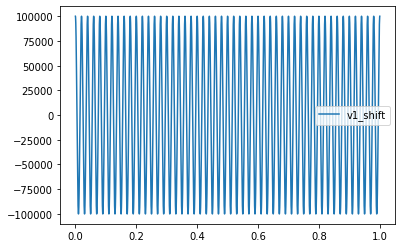

In [5]:
plt.figure()
plt.plot(trafo_elements_dp_shifted['v1_shift'].time, trafo_elements_dp_shifted['v1_shift'].values, label='v1_shift')
plt.legend()

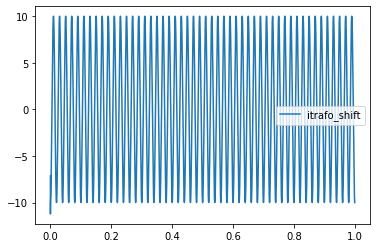

In [6]:
plt.figure()
plt.plot(trafo_elements_dp_shifted['itrafo_shift'].time, trafo_elements_dp_shifted['itrafo_shift'].values, label='itrafo_shift')
plt.legend()

## DP Trafo composite model

In [7]:
work_dir = 'logs/DP_Trafo_Component/'
log_name = 'DP_Trafo_Component'
print(work_dir + log_name + '.csv')
trafo_component = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
trafo_component_dp_shifted = ts.frequency_shift_list(trafo_component, 50)

logs/DP_Trafo_Component/DP_Trafo_Component.csv
column number: 3
results length: 20001
real column names: []
complex column names: ['itrafo', 'v1', 'v2']


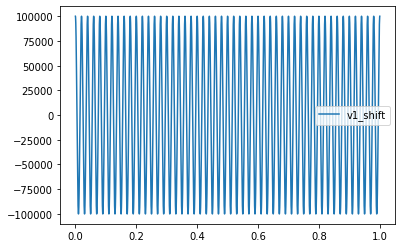

In [8]:
plt.figure()
plt.plot(trafo_component_dp_shifted['v1_shift'].time, trafo_component_dp_shifted['v1_shift'].values, label='v1_shift')
plt.legend()

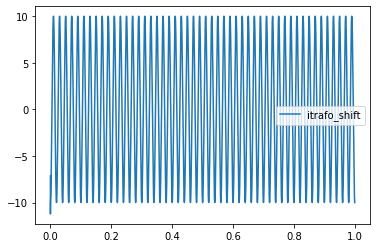

In [9]:
plt.figure()
plt.plot(trafo_component_dp_shifted['itrafo_shift'].time, trafo_component_dp_shifted['itrafo_shift'].values, label='itrafo_shift')
plt.legend()

## Error for DP Trafo

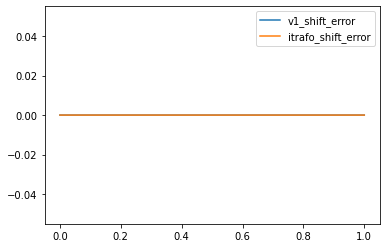

In [10]:
plt.figure()
for name in ['v1_shift', 'itrafo_shift']:
    plt.plot(trafo_elements_dp_shifted[name].time, trafo_elements_dp_shifted[name].values - trafo_component_dp_shifted[name].values, label=name+'_error')
plt.legend()

## Assertion for DP Trafo

In [13]:
errors_dp_shifted = []
for name in ['v1_shift', 'itrafo_shift']:
    errors_dp_shifted.append(np.absolute(trafo_elements_dp_shifted[name].values - trafo_component_dp_shifted[name].values).max())
    print(name + ': ' + str(errors_sp_shifted[-1]))
assert np.max(errors_dp_shifted) < epsilon

v1_shift: 0.0
itrafo_shift: 0.0


## EMT Trafo with elements

In [ ]:
work_dir = 'logs/EMT_Trafo_Elements/'
log_name = 'EMT_Trafo_Elements'
print(work_dir + log_name + '.csv')
trafo_elements_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

In [ ]:
plt.figure()
plt.plot(trafo_elements_emt['v1_0'].time, PEAK1PH_TO_RMS3PH*trafo_elements_emt['v1_0'].values, label='v1_0')
plt.legend()

In [ ]:
plt.figure()
plt.plot(trafo_elements_emt['itrafo_0'].time, PEAK1PH_TO_RMS3PH*trafo_elements_emt['itrafo_0'].values, label='itrafo_0')
plt.legend()

## EMT Trafo composite model

In [ ]:
work_dir = 'logs/EMT_Trafo_Component/'
log_name = 'EMT_Trafo_Component'
print(work_dir + log_name + '.csv')
trafo_component_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

In [ ]:
plt.figure()
plt.plot(trafo_component_emt['v1_0'].time, PEAK1PH_TO_RMS3PH*trafo_component_emt['v1_0'].values, label='v1_0')
plt.plot(trafo_component_emt['v1_1'].time, PEAK1PH_TO_RMS3PH*trafo_component_emt['v1_1'].values, label='v1_1')
plt.plot(trafo_component_emt['v1_2'].time, PEAK1PH_TO_RMS3PH*trafo_component_emt['v1_2'].values, label='v1_2')
plt.legend()

In [ ]:
plt.figure()
plt.plot(trafo_component_emt['itrafo_0'].time, PEAK1PH_TO_RMS3PH*trafo_component_emt['itrafo_0'].values, label='itrafo_0')
plt.plot(trafo_component_emt['itrafo_1'].time, PEAK1PH_TO_RMS3PH*trafo_component_emt['itrafo_1'].values, label='itrafo_1')
plt.plot(trafo_component_emt['itrafo_2'].time, PEAK1PH_TO_RMS3PH*trafo_component_emt['itrafo_2'].values, label='itrafo_2')
plt.legend()

## Error for EMT Trafo

In [ ]:
plt.figure()
for name in ['v1_0', 'v1_1', 'v1_1', 'itrafo_0', 'itrafo_1', 'itrafo_2']:
    plt.plot(trafo_elements_emt[name].time, trafo_elements_emt[name].values - trafo_component_emt[name].values, label=name+'_error')
plt.legend()

## Assertion for EMT Trafo

In [ ]:
errors_emt = []
for name in ['v1_0', 'v1_1', 'v1_1', 'itrafo_0', 'itrafo_1', 'itrafo_2']:
    errors_emt.append(np.absolute(trafo_elements_emt[name].values - trafo_component_emt[name].values).max())
    print(name + ': ' + str(errors_emt[-1]))
assert np.max(errors_emt) < epsilon

### Comparison SP vs. DP

In [ ]:
plt.figure()
for name in [('v1_shift', 'v1_shift')]:
    plt.plot(trafo_component_sp_shifted[name[0]].time, trafo_component_sp_shifted[name[0]].values - trafo_component_dp_shifted[name[1]].values, label=name[0]+' (SP) vs. '+name[1]+' (DP)')
plt.legend()

In [ ]:
plt.figure()
for name in [('itrafo_shift', 'itrafo_shift')]:
    plt.plot(trafo_component_sp_shifted[name[0]].time, trafo_component_sp_shifted[name[0]].values - trafo_component_dp_shifted[name[1]].values, label=name[0]+' (SP) vs. '+name[1]+' (DP)')
plt.legend()

### Assertion SP vs. DP

In [ ]:
compare_errors_abs = []
compare_errors_rel = []
for name in [('v1_shift', 'v1_shift'), ('itrafo_shift', 'itrafo_shift')]:
    compare_errors_abs.append(np.absolute(trafo_component_sp_shifted[name[0]].values - trafo_component_dp_shifted[name[1]].values).max())
    compare_errors_rel.append(np.absolute(trafo_component_sp_shifted[name[0]].values - trafo_component_dp_shifted[name[1]].values).max()/trafo_component_dp_shifted[name[1]].values.max())
    print(name[0]+' vs. '+name[1] + ' (abs): ' + str(compare_errors_abs[-1]))
    print(name[0]+' vs. '+name[1] + ' (rel): ' + str(compare_errors_rel[-1]))
print('Max rel error: '+ '{:.2}'.format(np.max(compare_errors_rel)*100) +'%')
assert np.max(compare_errors_rel) < 3e-1

### Comparison EMT vs. DP

In [ ]:
plt.figure()
for name in [('v1_0', 'v1_shift')]:
    plt.plot(trafo_component_emt[name[0]].time, PEAK1PH_TO_RMS3PH*trafo_component_emt[name[0]].values - trafo_component_dp_shifted[name[1]].values, label=name[0]+' vs. '+name[1])
plt.legend()

In [ ]:
plt.figure()
for name in [('itrafo_0', 'itrafo_shift')]:
    plt.plot(trafo_component_emt[name[0]].time, PEAK1PH_TO_RMS3PH*trafo_component_emt[name[0]].values - trafo_component_dp_shifted[name[1]].values, label=name[0]+' vs. '+name[1])
plt.legend()

### Assertion EMT vs. DP

In [ ]:
compare_errors_abs = []
compare_errors_rel = []
for name in [('v1_0', 'v1_shift'), ('itrafo_0', 'itrafo_shift')]:
    compare_errors_abs.append(np.absolute(PEAK1PH_TO_RMS3PH*trafo_component_emt[name[0]].values - trafo_component_dp_shifted[name[1]].values).max())
    compare_errors_rel.append(np.absolute(PEAK1PH_TO_RMS3PH*trafo_component_emt[name[0]].values - trafo_component_dp_shifted[name[1]].values).max()/trafo_component_dp_shifted[name[1]].values.max())
    print(name[0]+' vs. '+name[1] + ' (abs): ' + str(compare_errors_abs[-1]))
    print(name[0]+' vs. '+name[1] + ' (rel): ' + str(compare_errors_rel[-1]))
print('Max rel error: '+ '{:.2}'.format(np.max(compare_errors_rel)*100) +'%')
assert np.max(compare_errors_rel) < 1e-4